# Tarea #3 - Métodos supervisados

Alejandro Baltodano Madrigal, carné: 200928915

Fernando González Mata, cédula: 115400523

#Métricas para evaluar modelos de aprendizaje supervisado

#Ejemplo modelo regresión

En regresión el rendimiento de un modelo se basa en reportar el error en predicciones hechas por el modelo, se busca calcular qué tan cerca estuvieron las predicciones a los valores esperados.

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 0)

clf = LinearRegression()
clf.fit(X_train, y_train)
score = clf.score(X_train,y_train)

print("Métrica del modelo", score)
preds = clf.predict(X_test)

Métrica del modelo 0.9340217779843487


##Error medio cuadrado o Mean Squared Error (MSE)

MSE es el promedio de los cuadrados de los errores. Entre más grande el número más grande el error. Error en este caso significa la diferencia entre los valores observados y los valores predichos. La resta se eleva el cuadrado para evitar que se cancelen números negativos con positivos.

Entre más bajo sea el valor obtenido mejor es el modelo, significando 0 que el modelo es perfecto. MSE es susceptible a valores atípicos generando errores de error más grandes.

Un buen ejemplo para el uso de MSE es en la predicción de la temperatura en futuros días con base en observaciones obtenidas previamente, ya que las temperaturas tienden a seguir valores cercanos a la media.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, preds)
mse

0.05092322206134322

##Error cuadrático medio o Root Mean Square Error (RMSE)

Esta métrica es una extensión a MSE. Es importante destacar que se calcula la raíz cuadrada del error, lo que significa que las unidades del RMSE son las mismas que las unidades originales del valor objetivo que se predice.

Es común utilizar MSE para entrenar un modelo, y RMSE para evaluar y reportar el rendimiento del modelo.

Al ser una extensión de MSE, este método es susceptible a valores atípicos.

Un buen ejemplo para el uso de RMSE es en la predicción de precios de un producto con base en los últimos precios del mismo.

In [ ]:
import math

rmse = math.sqrt(mse)
rmse

0.22566174257357674

##Error absoluto medio o mean absolute error (MAE)

Es decir, MSE y RMSE castigan los errores más grandes que los errores más pequeños, inflando o magnificando la puntuación de error media. Esto se debe al cuadrado del valor de error. El MAE no da más o menos peso a los diferentes tipos de errores y, en cambio, las puntuaciones aumentan linealmente con los aumentos del error, por lo que no es susceptible a valores atípicos.

Como sugiere su nombre, la puntuación MAE se calcula como el promedio de los valores de error absoluto.

Un ejemplo puede ser la predicción de la inflación para diversos países, ya que en crisis el valor de la inflación puede cambiar drásticamente.

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, preds)
mae

0.186417079956073

##Puntuación R2

La puntuación R2 varía entre 0-1, siendo 1 el mejor valor que se le otorga a un modelo. Se basa en la correlación entre el valor predicho y el valor actual. No es susceptible a valores atípicos.

Un ejemplo de R2 puede ser en la estimación del precio de la moneda extranjera.

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, preds)
r2

0.9055032992676105

#Ejemplo modelo clasificación



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
cancer = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 0)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_train,y_train)

print("Metrica del modelo", score)
preds = clf.predict(X_test)

Metrica del modelo 0.9494505494505494


##Validación cruzada
Los métodos de validación, también conocidos como resampling, son estrategias que permiten estimar la capacidad predictiva de los modelos cuando se aplican a nuevas observaciones, haciendo uso únicamente de los datos de entrenamiento. La idea en la que se basan todos ellos es la siguiente: el modelo se ajusta empleando un subconjunto de observaciones del conjunto de entrenamiento y se evalúa (calcular una métrica que mida cómo de bueno es el modelo, por ejemplo, accuracy) con las observaciones restantes. Este proceso se repite múltiples veces y los resultados se agregan y promedian.

###k-Fold-Cross-Validation (CV) 
Las observaciones de entrenamiento se reparten en k folds (conjuntos) del mismo tamaño. El modelo se ajusta con todas las observaciones excepto las del primer fold y se evalúa prediciendo las observaciones del fold que ha quedado excluido, obteniendo así la primera métrica. El proceso se repite k veces, excluyendo un fold distinto en cada iteración. Al final, se generan k valores de la métrica, que se agregan (normalmente con la media y la desviación típica) generando la estimación final de validación.

**from sklearn.model_selection import KFold**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")

print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

Metricas cross_validation [0.95604396 0.9010989  0.87912088 0.91208791 0.93406593]
Media de cross_validation 0.9164835164835164


###Leave-One-Out Cross-Validation (LOOCV)
LOOCV es un caso especial de k-Fold-Cross-Validation en el que el número k de folds es igual al número de observaciones disponibles en el conjunto de entrenamiento. El modelo se ajusta cada vez con todas las observaciones excepto una, que se emplea para evaluar el modelo. Este método supone un coste computacional muy elevado, el modelo se ajusta tantas veces como observaciones de entrenamiento, por lo que, en la práctica, no suele compensar emplearlo.

**from sklearn.model_selection import LeaveOneOut**

In [ ]:
from sklearn.model_selection import LeaveOneOut

LOOCV = LeaveOneOut()
LOOCV.get_n_splits(iris.data)
scores = cross_val_score(clf, X_train, y_train, cv=LOOCV, scoring="accuracy")

print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

Metricas cross_validation [1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 

###Repeated k-Fold-Cross-Validation (repeated CV)
Es exactamente igual al método k-Fold-Cross-Validation pero repitiendo el proceso completo n veces. Por ejemplo, 10-Fold-Cross-Validation con 5 repeticiones implica a un total de 50 iteraciones ajuste-validación, pero no equivale a un 50-Fold-Cross-Validation.

**from sklearn.model_selection import RepeatedKFold**

In [ ]:
from sklearn.model_selection import RepeatedKFold

Repeatedkf = RepeatedKFold(n_splits = 5, n_repeats = 3)
scores = cross_val_score(clf, X_train, y_train, cv=Repeatedkf, scoring="accuracy")

print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

Metricas cross_validation [0.94505495 0.89010989 0.93406593 0.93406593 0.94505495 0.92307692
 0.92307692 0.92307692 0.94505495 0.92307692 0.89010989 0.91208791
 0.96703297 0.93406593 0.91208791]
Media de cross_validation 0.9267399267399269


##Accuracy y Kappa
Estas dos métricas son las más empleadas en problemas de clasificación binaria y multiclase. Accuracy es el porcentaje de observaciones correctamente clasificadas respecto al total de predicciones. Kappa o Cohen’s Kappa es el valor de accuracy normalizado respecto del porcentaje de acierto esperado por azar. A diferencia de accuracy, cuyo rango de valores puede ser [0, 1], el de kappa es [-1, 1]. En problemas con clases desbalanceadas, donde el grupo mayoritario supera por mucho a los otros, Kappa es más útil porque evita caer en la ilusión de creer que un modelo es bueno cuando realmente solo supera por poco lo esperado por azar.

**from sklearn import metrics**

In [ ]:
score_pred = metrics.accuracy_score(y_test, preds)
print("Metrica en Test accuracy", score_pred)

score_pred_kappa = metrics.cohen_kappa_score(y_test, preds)
print("Metrica en Test kappa", score_pred_kappa)

Metrica en Test accuracy 0.9385964912280702
Metrica en Test kappa 0.8736942070275404


## Matriz de confusión
Una matriz de confusión, también conocida como matriz de error, es una tabla resumida que se utiliza para evaluar el rendimiento de un modelo de clasificación. El número de predicciones correctas e incorrectas se resumen con los valores de conteo y se desglosan por cada clase.

**from sklearn.metrics import confusion_matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("confusion_matrix\n",confusion_matrix(y_test,clf.predict(X_test),normalize='true'),"\n",confusion_matrix(y_test,clf.predict(X_test)))
print("\nclassification_report\n",classification_report(y_test,clf.predict(X_test),target_names=cancer.target_names))

confusion_matrix
 [[0.93617021 0.06382979]
 [0.05970149 0.94029851]] 
 [[44  3]
 [ 4 63]]

classification_report
               precision    recall  f1-score   support

   malignant       0.92      0.94      0.93        47
      benign       0.95      0.94      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



###Exactitud
Esto es simplemente igual a la proporción de predicciones que el modelo clasificó correctamente.

In [ ]:
from sklearn.metrics import accuracy_score
print("\naccuracy_score",accuracy_score(y_test,clf.predict(X_test)))


accuracy_score 0.9385964912280702


###Sensibilidad
La sensibilidad, tasa de aciertos o tasa positiva real (TPR), es la proporción de la cantidad total de instancias pertinentes que se recuperaron realmente. Responde a la pregunta "¿Qué proporción de positivos reales se identificó correctamente?"

In [ ]:
from sklearn.metrics import recall_score
print("recall_score",recall_score(y_test,clf.predict(X_test)))

recall_score 0.9402985074626866


###Precisión
La precisión también se conoce como valor predictivo positivo y es la proporción de instancias relevantes entre las instancias recuperadas. En otras palabras, responde a la pregunta "¿Qué proporción de identificaciones positivas fue realmente correcta?"

In [ ]:
from sklearn.metrics import precision_score
print("precision_score",precision_score(y_test,clf.predict(X_test)))

precision_score 0.9545454545454546


###Puntuación F1
El puntaje F1 es una medida de la precisión de una prueba, es la media armónica de precisión y recuperación. Puede tener una puntuación máxima de 1 (precisión y recuerdo perfectos) y una mínima de 0. En general, es una medida de la precisión y robustez de su modelo.

In [ ]:
from sklearn.metrics import f1_score
print("f1_score",f1_score(y_test,clf.predict(X_test)))

f1_score 0.9473684210526316


#Dataset seleccionado

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('big-mart-sales.csv')

# Visualizar dataset
**Detalle del dataset a trabajar**

*   **Item_Identifier:** Identificador único de producto asignado a cada artículo distinto. Consiste en una cadena alfanumérica de 5 carácteres.
*   **Item_Weight:** Peso del producto.
*   **Item_Fat_Content:** Atributo es categórico que describe si el producto es bajo en grasa o no. Hay 2 categorías de este atributo: ['Bajo en grasa', 'Regular']. Sin embargo, es importante tener en cuenta que 'Low Fat' también se ha escrito como 'low fat' y 'LF' en el conjunto de datos, mientras que 'Regular' también se ha denominado 'reg'.
*   **Item_Visibility:** Porcentaje del área de visualización total de todos los productos en una tienda asignada al producto en particular.
*   **Item_Type:** Atributo categórico que describe la categoría de alimentos a la que pertenece el artículo. Hay 16 categorías diferentes enumeradas de la siguiente manera: ['Lácteos', 'Refrescos', 'Carne', 'Frutas y verduras', 'Hogar', 'Productos para hornear', 'Bocadillos', 'Alimentos congelados', 'Desayuno', 'Salud e higiene', 'Bebidas duras', 'Enlatados', 'Panes', 'Alimentos con almidón', 'Otros', 'Mariscos'].
*   **Item_MRP:** Precio de venta máximo (precio de lista) del producto.
*   **Outlet_Identifier:** Identificador único de tienda asignado. Consiste en una cadena alfanumérica de 6 carácteres.
*   **Outlet_Establishment_Year:** Año en que se estableció la tienda.
*   **Outlet_Size:** Tamaño de la tienda en términos de área de suelo cubierta. Es un valor categórico y se describe en 3 categorías: ['Alto', 'Medio', 'Pequeño']
*   **Outlet_Location_Type:** Atributo categórico sobre el tamaño de la ciudad en la que se encuentra la tienda a través de 3 categorías: ['Nivel 1', 'Nivel 2', 'Nivel 3'].
*   **Outlet_Type:** Atributo categórico que indica si el punto de venta es solo una tienda de comestibles o algún otro tipo de supermercado. A continuación, se presentan las 4 categorías en las que se dividen los datos: ['Tipo de supermercado1', 'Tipo de supermercado2', 'Tienda de comestibles', 'Tipo de supermercado3'].
*   **Item_Outlet_Sales:** Ventas del producto en la tienda.

In [ ]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

def distribution_plot(dataframe, variable, titulo):
    fig = px.histogram(dataframe,
                       x=variable,
                       marginal='box',
                       title='Distribución de '+ variable + titulo)
    fig.update_layout(bargap=0.1)
    fig.show()

##TOP 5 del dataset

In [ ]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Resumen del dataset

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Tipos de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


# Preprocesado

In [ ]:
dataset = df[df['Item_Outlet_Sales'].notnull()]

print(dataset.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


##Manejo de datos faltantes

In [ ]:
#Columnas con valores nulos
print(dataset.columns[dataset.isnull().any()])

#Porcentaje de valores nulos
dataset.isnull().sum() / dataset.shape[0] * 100

Index(['Item_Weight', 'Outlet_Size'], dtype='object')


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
#Item_Weight se llenará con los valores de la media
dataset['Item_Weight'] = dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean())

#Outlet_Size se llenará con valores de la moda al ser categórica
dataset['Outlet_Size'] = dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0])

print(dataset.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
distribution_plot(dataset, 'Item_Weight' , 'despues del reemplazo')

##Agrupar valores categóricos con mismo significado
Como notamos la columna **'Item_Fat_Content'** define 'Low Fat' con dos formas de escritura entonces unificamos reemplazando el LF que es el acrónimo, mismo caso para 'Regular'.

**Paso 1:** Contar los valores por categoría para demostrar el problema en el dataset por medio de la función **value_counts()**.

**Paso 2:** Aplicar el reemplazo en la columna con la función **replace()**.

**Paso 3:** Verificar que haya quedado el cambio aplicado según lo esperado.

ANTES DE UNIFICAR:
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


DESPUES DE UNIFICAR:
 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


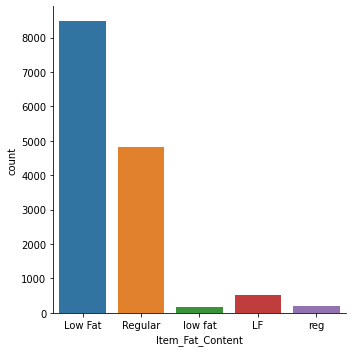

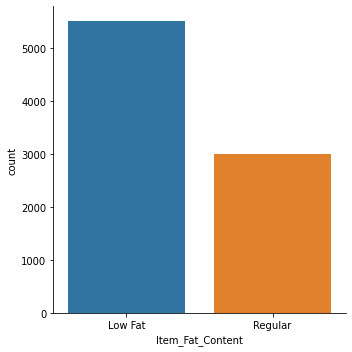

In [ ]:
print("ANTES DE UNIFICAR:\n", df['Item_Fat_Content'].value_counts())
sns.catplot(x='Item_Fat_Content', kind='count', data=df)

dataset.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
print("\n\nDESPUES DE UNIFICAR:\n", dataset['Item_Fat_Content'].value_counts())
sns.catplot(x='Item_Fat_Content', kind='count', data=dataset)

# Exploración de los datos


1. Item Fat Content



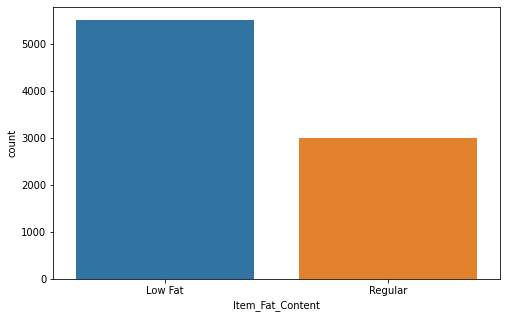

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content', data=dataset)

2. Item Type

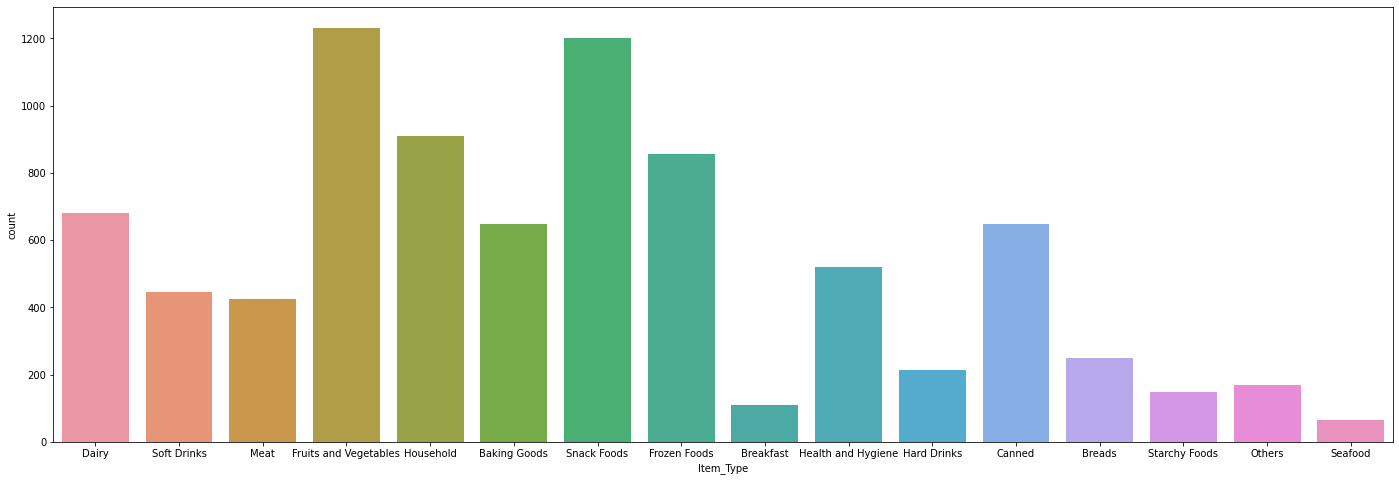

In [ ]:
plt.figure(figsize=(24,8))
sns.countplot('Item_Type', data=dataset)

3. Outlet Size

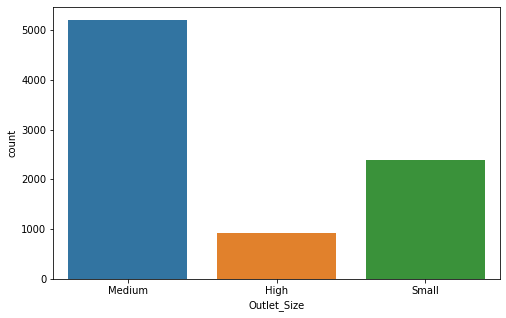

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size', data=dataset)

4. Outlet Location

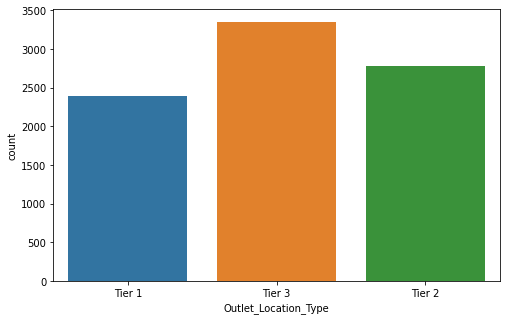

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type', data=dataset)

5. Outlet Type

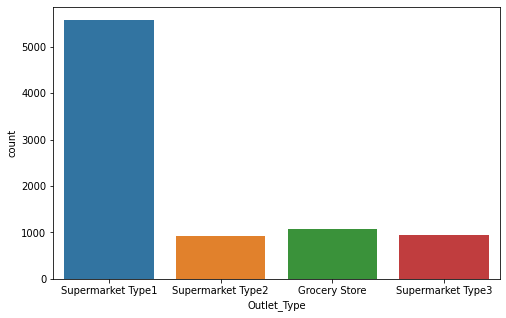

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type', data=dataset)

Matriz de correlación

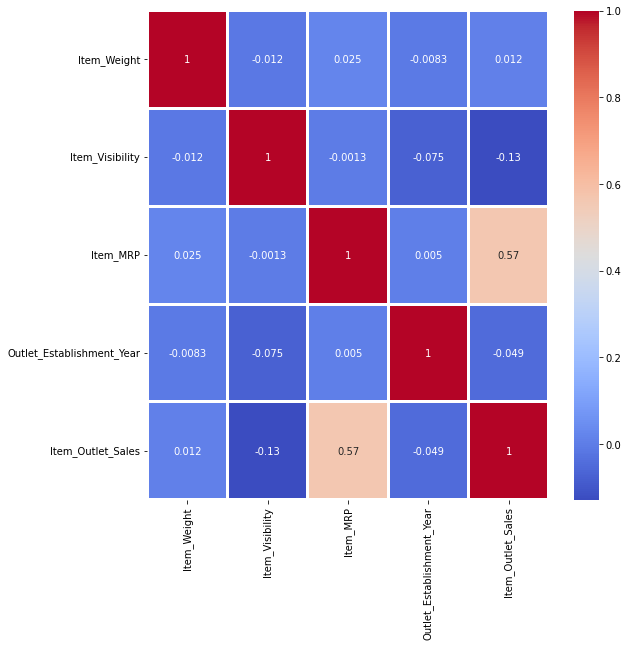

In [ ]:
plt.figure(figsize=(9, 9))
ax = sns.heatmap(data=dataset.corr(), cmap='coolwarm', annot=True, linewidths=2)

#Métodos supervisados - Regresión
El aprendizaje supervisado supone que partimos de un conjunto de datos etiquetado previamente, es decir, conocemos el valor del atributo objetivo para el conjunto de datos que disponemos.

La estimación de los precios se realizará mediante modelos de regresión.


##Encodear datos categóricos a valores numéricos

En seguida se encodearán los valores de las variables categóricas en valores numéricos.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset['Item_Fat_Content'] = encoder.fit_transform(dataset['Item_Fat_Content'])
dataset['Item_Type'] = encoder.fit_transform(dataset['Item_Type'])
dataset['Outlet_Size'] = encoder.fit_transform(dataset['Outlet_Size'])
dataset['Outlet_Location_Type'] = encoder.fit_transform(dataset['Outlet_Location_Type'])
dataset['Item_Identifier'] = encoder.fit_transform(dataset['Outlet_Location_Type'])
dataset['Outlet_Identifier'] = encoder.fit_transform(dataset['Outlet_Location_Type'])
dataset['Outlet_Type'] = encoder.fit_transform(dataset['Outlet_Type'])

dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.30,0,0.016047,4,249.8092,0,1999,1,0,1,3735.1380
1,2,5.92,1,0.019278,14,48.2692,2,2009,1,2,2,443.4228
2,0,17.50,0,0.016760,10,141.6180,0,1999,1,0,1,2097.2700
3,2,19.20,1,0.000000,6,182.0950,2,1998,1,2,0,732.3800
4,2,8.93,0,0.000000,9,53.8614,2,1987,0,2,1,994.7052


##Split del dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

values = dataset.drop(columns='Item_Outlet_Sales')
target = dataset['Item_Outlet_Sales']
x_train, x_test, y_train, y_test = train_test_split(values, target, test_size=0.30, random_state=0)
print(x_train.shape, x_test.shape)

(5966, 11) (2557, 11)


##Regresión Lasso

Se revisa el algoritmo modificando el alpha desde 0 hasta 0.5 observando que 0.01 nos refleja la mejor configuracion para pr4ediccion.
El set de datos validamos la correlacion entre variables y notamos que las variables son independientes ademas intentamos quitar algunos feature y obtuvimos una degradacion en todas los algoritmos que probamos por lo tanto en caso de **Lasso** nos inclinamos por la configuracion siguiente y en conclusion no logramos tener un resultado bueno por que las prediccion alcanza 50%

 Mean Squared Error: 1500283.41
 Root Mean Squared Error: 1224.86
 Mean Absolute Error: 927.27
 R^2 Score: 0.5073


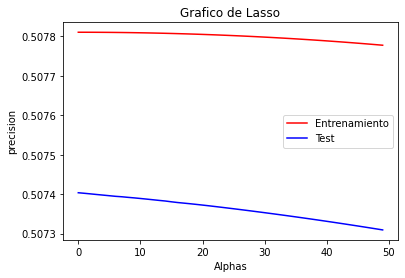

In [ ]:
from sklearn.linear_model import Lasso

train_prec =  []
eval_prec = []
max_alpha_list = list(range(0, 50))

for varAlpha in max_alpha_list:
    lasso_model = Lasso(alpha = varAlpha / 100)
    lasso_model.fit(x_train, y_train)
    train_prec.append(lasso_model.score(x_train, y_train))
    eval_prec.append(lasso_model.score(x_test, y_test))
    y_pred = lasso_model.predict(x_test)

lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(x_train, y_train)

Lasso_MSE = round(MSE(y_test, y_pred), 2)
Lasso_RMSE = round(math.sqrt(Lasso_MSE), 2)
Lasso_MAE = round(MAE(y_test, y_pred), 2)
Lasso_R_2 = round(R2(y_test, y_pred), 4)

print(f" Mean Squared Error: {Lasso_MSE}")
print(f" Root Mean Squared Error: {Lasso_RMSE}")
print(f" Mean Absolute Error: {Lasso_MAE}")
print(f" R^2 Score: {Lasso_R_2}")


# graficar los resultados.
plt.plot(max_alpha_list, train_prec, color='r', label='Entrenamiento')
plt.plot(max_alpha_list, eval_prec, color='b', label='Test')
plt.title('Grafico de Lasso')
plt.legend()
plt.ylabel('precision')
plt.xlabel('Alphas')
plt.show()

##Regresión Árbol de Decisión

###Intento 1
Se sobre ajusta por que el arbol se particiona cada hoja hasta el final teniendo un dato contenido con su hoja correspondiente sobre ajustandose al modelo de datos de entrenamiento y asi logra una precision de 100%

In [ ]:
#Sobreajuste - train alto y test bajo
#SubAjuste - train y test bajos
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

DT_MSE = round(MSE(y_test, y_pred), 2)
DT_RMSE = round(math.sqrt(DT_MSE), 2)
DT_MAE = round(MAE(y_test, y_pred), 2)
DT_R_2 = round(R2(y_test, y_pred), 4)

print(f" Mean Squared Error: {DT_MSE}")
print(f" Root Mean Squared Error: {DT_RMSE}")
print(f" Mean Absolute Error: {DT_MAE}")
print(f" R^2 Score: {DT_R_2}")

 Mean Squared Error: 2397931.65
 Root Mean Squared Error: 1548.53
 Mean Absolute Error: 1097.73
 R^2 Score: 0.2125


Para el caso de los arboles dejamos el ejemplo anterior para ver como funciona el algoritmo sin tocar sus hiperparametros y realmente le va muy mal cae en un sobreajuste total ya que sobre los datos de entrenamiento alcanza 100% de aciertos pero en el test le va super mal dando.

Ahora modificando el dataset, repasando como hicimos con el algoritmo de Lazzo se valida correlacion de los datos, la imputacion se hace por medio de media y moda.

Si exluimos algunos feature tenemos el mismo compartamiento de Lazzo, degrada la efectividad por lo que vemos la importancia de mantenerlos.

Pero si notamos que la profundida correcta del arbol es de 5 para alcanzar una precision de casi 60%.

Despues de estar modificando parametros y los datos determinamos que este setdatos es complicado tanto para Lazzo como Tree ya que no tenemos una efectividad alta.

###Intento 2

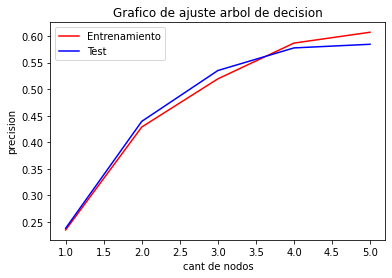

 Mean Squared Error: 1265399.79
 Root Mean Squared Error: 1124.9
 Mean Absolute Error: 791.36
 R^2 Score: 0.5844
Profundidad del árbol: 5
Número de nodos terminales: 32


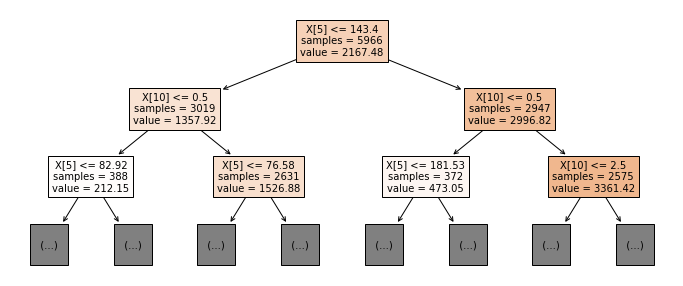

In [ ]:
from sklearn.tree import plot_tree

train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 6))

for deep in max_deep_list:
    cls = DecisionTreeRegressor(max_depth=deep)
    cls.fit(x_train, y_train)
    train_prec.append(cls.score(x_train, y_train))
    eval_prec.append(cls.score(x_test, y_test))
    y_pred = cls.predict(x_test)



# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='Entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Test')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

DT_MSE = round(MSE(y_test, y_pred), 2)
DT_RMSE = round(math.sqrt(DT_MSE), 2)
DT_MAE = round(MAE(y_test, y_pred), 2)
DT_R_2 = round(R2(y_test, y_pred), 4)

print(f" Mean Squared Error: {DT_MSE}")
print(f" Root Mean Squared Error: {DT_RMSE}")
print(f" Mean Absolute Error: {DT_MAE}")
print(f" R^2 Score: {DT_R_2}")

# Estructura del árbol creado
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {cls.get_depth()}")
print(f"Número de nodos terminales: {cls.get_n_leaves()}")

plot = plot_tree(
            decision_tree = cls,
            max_depth     = 2,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

##Regresión KNN

Para este caso sometemos las mismas pruebas que los anteriores y corremos un for sobre el hiperparametro de K en lo que localizamos que ajustandolo al valor 6 logramos la mejor efectivadad de 46% por que despues de ese valor se comienza a degradar, a este punto viendo que de los 3 modelos usados lo mejor logrado es un 60% nos damos cuenta que estamos lejos del objetivo de tener un buen modelo predictivo para las ventas. Los datos son complicados para que el modelo pueda ser efectivo. Nos faltan feature mas representativos sobre las ventas y evitar el grado de imputaciones que tuvimos que realizarle al dataset


K =  1
 Mean Squared Error: 2529442.95
 Root Mean Squared Error: 1590.42
 Mean Absolute Error: 1097.06
 R^2 Score: 0.1693

K =  2
 Mean Squared Error: 1934255.97
 Root Mean Squared Error: 1390.78
 Mean Absolute Error: 972.32
 R^2 Score: 0.3648

K =  3
 Mean Squared Error: 1757050.57
 Root Mean Squared Error: 1325.54
 Mean Absolute Error: 939.99
 R^2 Score: 0.423

K =  4
 Mean Squared Error: 1696958.48
 Root Mean Squared Error: 1302.67
 Mean Absolute Error: 924.93
 R^2 Score: 0.4427

K =  5
 Mean Squared Error: 1656266.46
 Root Mean Squared Error: 1286.96
 Mean Absolute Error: 924.2
 R^2 Score: 0.4561

K =  6
 Mean Squared Error: 1632426.33
 Root Mean Squared Error: 1277.66
 Mean Absolute Error: 922.61
 R^2 Score: 0.4639

K =  7
 Mean Squared Error: 1638166.03
 Root Mean Squared Error: 1279.91
 Mean Absolute Error: 930.64
 R^2 Score: 0.462

K =  8
 Mean Squared Error: 1621380.09
 Root Mean Squared Error: 1273.33
 Mean Absolute Error: 932.03
 R^2 Score: 0.4675

K =  9
 Mean Squared Erro

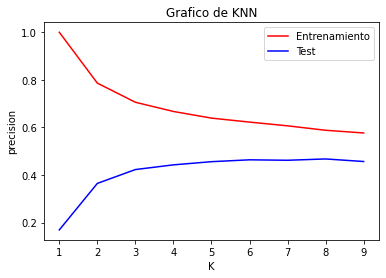

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

train_prec =  []
eval_prec = []    
max_k_list = list(range(1, 10))

for K in max_k_list:
  knn_model = KNeighborsRegressor(n_neighbors = K)
  knn_model.fit(x_train, y_train)
  train_prec.append(knn_model.score(x_train, y_train))
  eval_prec.append(knn_model.score(x_test, y_test))
  y_pred = knn_model.predict(x_test)

  KNN_MSE = round(MSE(y_test, y_pred), 2)
  KNN_RMSE = round(math.sqrt(KNN_MSE), 2)
  KNN_MAE = round(MAE(y_test, y_pred), 2)
  KNN_R_2 = round(R2(y_test, y_pred), 4)

  print("\nK = ", K)
  print(f" Mean Squared Error: {KNN_MSE}")
  print(f" Root Mean Squared Error: {KNN_RMSE}")
  print(f" Mean Absolute Error: {KNN_MAE}")
  print(f" R^2 Score: {KNN_R_2}")

# graficar los resultados.
plt.plot(max_k_list, train_prec, color='r', label='Entrenamiento')
plt.plot(max_k_list, eval_prec, color='b', label='Test')
plt.title('Grafico de KNN')
plt.legend()
plt.ylabel('precision')
plt.xlabel('K')
plt.show()

##Método de emsamble **AdaBoostRegressor**

Un regresor AdaBoost es un metaestimador que comienza ajustando un regresor en el conjunto de datos original y luego ajusta copias adicionales del regresor en el mismo conjunto de datos, pero donde los pesos de las instancias se ajustan según el error de la predicción actual. Como tal, los regresores posteriores se enfocan más en casos difíciles. Esta clase implementa el algoritmo conocido como AdaBoost.

Obtenemos un resultado muy parecido al de los demas algoritmo ajustando el estimador a 6 y que perdida este dada por funcion exponencial

Logramos 57% de efectividad en el modelo por lo tanto ya cambiando varias metricas desde seleccion de feature, imputacion de datos y hiperparametros determinamos que con el set de datos que tenemos logramos maximo un precision de 60% con modelos de Tree ademas los tree tiene una velosidad mucho mayor de ejecucion del algortimo


estimators =  29
 Mean Squared Error: 1641919.34
 Root Mean Squared Error: 1281.37
 Mean Absolute Error: 1041.01
 R^2 Score: 0.4608


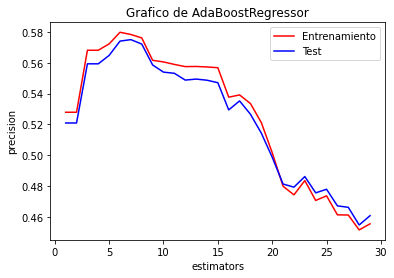

 Mean Squared Error: 1297066.91
 Root Mean Squared Error: 1138.89
 Mean Absolute Error: 839.38
 R^2 Score: 0.574


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

train_prec =  []
eval_prec = []    
max_estimators_list = list(range(1, 30))

for estimators in max_estimators_list:
  regr = AdaBoostRegressor(random_state=0, n_estimators=estimators , learning_rate = 1, loss = 'exponential')
  regr.fit(x_train, y_train)
  train_prec.append(regr.score(x_train, y_train))
  eval_prec.append(regr.score(x_test, y_test))
  y_pred = regr.predict(x_test)

  KNN_MSE = round(MSE(y_test, y_pred), 2)
  KNN_RMSE = round(math.sqrt(KNN_MSE), 2)
  KNN_MAE = round(MAE(y_test, y_pred), 2)
  KNN_R_2 = round(R2(y_test, y_pred), 4)

print("\nestimators = ", estimators)
print(f" Mean Squared Error: {KNN_MSE}")
print(f" Root Mean Squared Error: {KNN_RMSE}")
print(f" Mean Absolute Error: {KNN_MAE}")
print(f" R^2 Score: {KNN_R_2}")

# graficar los resultados.
plt.plot(max_estimators_list, train_prec, color='r', label='Entrenamiento')
plt.plot(max_estimators_list, eval_prec, color='b', label='Test')
plt.title('Grafico de AdaBoostRegressor')
plt.legend()
plt.ylabel('precision')
plt.xlabel('estimators')
plt.show()

regr = AdaBoostRegressor(random_state=0, n_estimators=6, learning_rate = 1, loss = 'exponential')
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

KNN_MSE = round(MSE(y_test, y_pred), 2)
KNN_RMSE = round(math.sqrt(KNN_MSE), 2)
KNN_MAE = round(MAE(y_test, y_pred), 2)
KNN_R_2 = round(R2(y_test, y_pred), 4)

print(f" Mean Squared Error: {KNN_MSE}")
print(f" Root Mean Squared Error: {KNN_RMSE}")
print(f" Mean Absolute Error: {KNN_MAE}")
print(f" R^2 Score: {KNN_R_2}")